In [61]:
from math import sqrt
import statistics
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
import math
import time
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')



D_data = pd.read_csv("DanishFinalData.csv")
D_data = D_data.iloc[::-1]
print(D_data.head())
D_data.index = pd.to_datetime(D_data["DateCGM"])


                          DateCGM  Value CGM                   DateBolus  \
35100  2017-07-24 18:59:42.000004      314.0  2017-07-25 12:08:54.000000   
35099  2017-07-24 18:59:44.000003      314.0  2017-07-25 12:08:54.000000   
35098  2017-07-24 19:00:01.000001      314.0  2017-07-25 12:08:54.000000   
35097  2017-07-24 19:02:03.000003      314.0  2017-07-25 12:08:54.000000   
35096  2017-07-24 19:30:37.000000      314.0  2017-07-25 12:08:54.000000   

       Value Bolus  
35100          0.0  
35099          0.0  
35098          0.0  
35097          0.0  
35096          0.0  


In [62]:
dp_prediction_test_result = sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).filter(sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).fit().params).get_prediction(start=28001, end=35100, dynamic=False, full_results=True).predicted_mean

ans = []
for i in range(0,7100):
    #print(dp_predict_test.get(i))
    ans.append(dp_prediction_test_result.get(i))
    if(i % 300 == 0) and type(i)!=None:
        print('Time point = ' + str(i) + ' - Predicted value = %.3f, Expected value = %.3f ' % (dp_prediction_test_result.get(i), D_data["Value CGM"][i]))
print('\nTest Mean Absolute Error: %.3f' % (mean_absolute_error(D_data[28001:35101]["Value CGM"], ans)))
print('\nTest Root Mean Squared Error: %.3f' % (sqrt(mean_squared_error(D_data[28001:35101]["Value CGM"], ans))))
print('\nTest Mean Squared Error: %.3f' % (mean_squared_error(D_data[28001:35101]["Value CGM"], ans)))

Time point = 0 - Predicted value = 141.352, Expected value = 314.000 
Time point = 300 - Predicted value = 122.266, Expected value = 101.000 
Time point = 600 - Predicted value = 114.196, Expected value = 69.000 
Time point = 900 - Predicted value = 156.438, Expected value = 227.000 
Time point = 1200 - Predicted value = 220.175, Expected value = 181.000 
Time point = 1500 - Predicted value = 145.066, Expected value = 195.000 
Time point = 1800 - Predicted value = 89.763, Expected value = 325.000 
Time point = 2100 - Predicted value = 165.598, Expected value = 190.000 
Time point = 2400 - Predicted value = 195.702, Expected value = 103.000 
Time point = 2700 - Predicted value = 207.278, Expected value = 199.000 
Time point = 3000 - Predicted value = 83.925, Expected value = 119.000 
Time point = 3300 - Predicted value = 150.668, Expected value = 192.000 
Time point = 3600 - Predicted value = 131.401, Expected value = 159.000 
Time point = 3900 - Predicted value = 81.026, Expected value

<AxesSubplot:xlabel='DateCGM'>

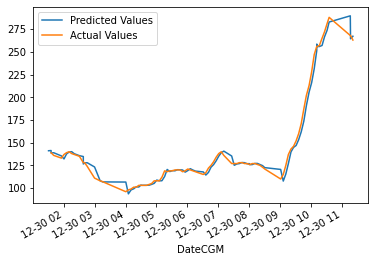

In [47]:
ans = sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).filter(sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).fit().params).predict(28000,28099);
Tv = D_data["Value CGM"][28001:35101].head(99);
danish_res = pd.DataFrame();
danish_res['Predicted Values'] = ans
danish_res['Actual Values'] = Tv
danish_res.plot()

In [60]:


ans1 = sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).filter(sm.tsa.SARIMAX(D_data["Value CGM"], order=(1,1,1), seasonal_order=(1,0,1,12)).fit().params).predict(28000,35100);


count,count2 = 0 , 0
for i in range(28001, 28001+len(D_data[28001:35100])):
    if D_data['Value Bolus'][i] > 1.0: count += 1
threshold_value = np.mean(D_data[28001:35101])*0.4
for i in range(7100):
    if (abs(ans1[i]-(D_data["Value CGM"][28001:35101])[i])) > threshold_value["Value CGM"]: count2 += 1  
    if math.isnan(ans1[i]) or math.isnan(ans2[i]): 
        continue

accuracy_answer = (count2/count)*100

print("Accuracy:", accuracy_answer)

Accuracy: 82.84023668639054
